In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import re
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import nltk

import preprocess

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Text mining project/

/content/drive/My Drive/Text mining project


In [ ]:
# download nltk packages
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# get filenames
mental_health_path = "datasets/mental_health/"
mental_health_csv_files = glob.glob(os.path.join(mental_health_path, "*.csv"))

non_mental_health_path = "datasets/non_mental_health/"
non_mental_health_csv_files = glob.glob(os.path.join(non_mental_health_path, "*.csv"))

In [ ]:
# read mental health issues data
for i in range(len(mental_health_csv_files)):

    if i == 0:
      mental_health_df = pd.read_csv(mental_health_csv_files[i], encoding='utf-8')
    else:
      mental_health_df = pd.concat([mental_health_df, pd.read_csv(mental_health_csv_files[i], encoding='utf-8')])
      
    # print the location and filename
    print('File Name:', mental_health_csv_files[i])
      
    # print the content
    print("length of df: ", len(mental_health_df))

File Name: datasets/mental_health/addiction_pre_features_tfidf_256.csv
length of df:  4099
File Name: datasets/mental_health/addiction_post_features_tfidf_256.csv
length of df:  5882
File Name: datasets/mental_health/addiction_2018_features_tfidf_256.csv
length of df:  6384
File Name: datasets/mental_health/addiction_2019_features_tfidf_256.csv
length of df:  7641
File Name: datasets/mental_health/adhd_post_features_tfidf_256.csv
length of df:  21243
File Name: datasets/mental_health/adhd_2019_features_tfidf_256.csv
length of df:  31466
File Name: datasets/mental_health/adhd_2018_features_tfidf_256.csv
length of df:  36576
File Name: datasets/mental_health/alcoholism_pre_features_tfidf_256.csv
length of df:  39663
File Name: datasets/mental_health/alcoholism_post_features_tfidf_256.csv
length of df:  41091
File Name: datasets/mental_health/alcoholism_2019_features_tfidf_256.csv
length of df:  42033
File Name: datasets/mental_health/alcoholism_2018_features_tfidf_256.csv
length of df:  

In [ ]:
# load non-mental health issues data
for i in range(len(non_mental_health_csv_files)):

    if i == 0:
      non_mental_health_df = pd.read_csv(non_mental_health_csv_files[i], encoding='utf-8')
    else:
      non_mental_health_df = pd.concat([non_mental_health_df, pd.read_csv(non_mental_health_csv_files[i], encoding='utf-8')])
      
    # print the location and filename
    print('File Name:', non_mental_health_csv_files[i])
      
    # print the content
    print("length of df: ", len(non_mental_health_df))

File Name: datasets/non_mental_health/conspiracy_pre_features_tfidf_256.csv
length of df:  12457
File Name: datasets/non_mental_health/conspiracy_post_features_tfidf_256.csv
length of df:  22390
File Name: datasets/non_mental_health/conspiracy_2019_features_tfidf_256.csv
length of df:  26503
File Name: datasets/non_mental_health/conspiracy_2018_features_tfidf_256.csv
length of df:  29847
File Name: datasets/non_mental_health/divorce_pre_features_tfidf_256.csv
length of df:  36266
File Name: datasets/non_mental_health/divorce_post_features_tfidf_256.csv
length of df:  39013
File Name: datasets/non_mental_health/divorce_2019_features_tfidf_256.csv
length of df:  41216
File Name: datasets/non_mental_health/divorce_2018_features_tfidf_256.csv
length of df:  42441
File Name: datasets/non_mental_health/guns_2018_features_tfidf_256.csv
length of df:  45629
File Name: datasets/non_mental_health/fitness_pre_features_tfidf_256.csv
length of df:  67793
File Name: datasets/non_mental_health/fitnes

In [ ]:
short_1 = mental_health_df[["subreddit", "author", "date", "post"]]
short_1.head(5)

,subreddit,author,date,post
0,addiction,iephillips,2019/04/16,Heroin Should I tell my ex wife that I tried heroin?
1,addiction,michaelmichael861,2019/04/16,"Strange side effects, please give any advice. For roughly the past four years, I had not been able to go more than a few days without drinking. I drank pretty heavily, and also smoked a lot of pot.This began to affect my focus, which caused me to go on Adderall 2 years ago. I also smoked cigarettes pretty heavily. I'm recently, as of the past two months, completely sober of everything but marijuana, which I tried to quit a week ago. This is the longest I've ever gone without drinking as in every other time I tried to quit I barely lasted 3-4 days.\n\n&amp;#x200B;\n\nI wanted to discuss two side effects that are one bad and the other maybe bad/strange and definitely would like some of your advice on.\n\n&amp;#x200B;\n\nI have never gone this long without using alcohol, by the way, the adderall and cigarettes are just an added bonus. It's an amazing feeling I have, but I want to address the fact that I have substituted alcohol with working out. I find this bizarre, but cool at the same time. I also experienced intense anger issues 3 days ago when I tried to quit marijuana.\n\n&amp;#x200B;\n\nI worked out for four hours straight one day.\n\n&amp;#x200B;\n\nHas anyone experienced any strange substitutions like this?\n\n&amp;#x200B;\n\nI guess my question to summarize, is do you, or is it common for people to experience weird substitutes and/or the intense anger that came three days ago when I tried to quit marijuana?\n\n&amp;#x200B;\n\nWeed's the last thing I need to quit.\n\n&amp;#x200B;\n\nI'm very proud of myself and don't want to screw this up. I've never felt or looked this amazing."
2,addiction,waismannmethod,2019/04/16,"New York Heroin Use Figures Higher Than US Average We need to be very careful when reading these reports in order to understand what they really mean. Not long ago, people got excited about reports showing a decline in the number of people abusing prescription opiates. The real reason for the decline, however, was that people escalated their use from pills to heroin. In other words, news that was supposed to be good should actually have been a reason for alarm!\n\nAs [opioid treatment specialists](https://www.opiates.com/opioid-treatment/) for over 20 years, we see patients who fly in from all over the country. Lately, a large number of our heroin patients, especially from the east coast, have tested negative for opioids. What does that mean? It means we don't even know what is being sold on the streets as ""heroin."" As similar as the euphoria is to a heroin high, the chemicals used are unknown. We are treating these patients in the hospital while preparing for very unusual withdrawal symptoms.\n\nSo when I see reports about a decline in addiction to a certain drug, I become wary of the news. Effective detoxification followed by accessible, individual mental health is still a rarity. Without that or other clear, positive factors to cause that decline, the real reason for the decline needs to be carefully identified."
3,addiction,StunnyG,2019/04/16,"New here but not to recovery. Looking to share my song/video with those that know exactly what it’s like! It’s up to ME to find relief and it starts within, can’t always rely on drugs or sex! My name is StunnyG and I am a hip hop artist in recovery. I find releasing these emotions over a beat to be extremely helpful and I truly hope you all will enjoy this! Do not mean to spam, I really hope this helps someone get another day clean or shocks someones system into starting the process of getting clean. \n[Come Here (Official Music Video) WARNING: May contain triggers!](https://youtu.be/3Egm4pirrJY)"
4,addiction,8923578295789advice,2019/04/16,"im clean my aunt (who i live with) found a packet of cigarettes in the trash, she then searched my room and found all my smoking gear (i also smoke pot) and when i got hom

In [ ]:
print("num_1_labels: ", len(short_1))

num_1_labels:  472813


In [ ]:
del mental_health_df

In [ ]:
short_0 = non_mental_health_df[["subreddit", "author", "date", "post"]]
short_0.head(5)

,subreddit,author,date,post
0,conspiracy,catvlyst,2018/12/17,"My argument against the annunaki narrative One idea I’ve always toyed with is whether or not there is any truth to Zecharia Sitchin’s work pertaining to the idea that extraterrestrials have been manipulating our government since at least Sumerian times. After watching countless annunaki videos on YouTube, I’ve concluded that the idea is mostly new age pseudoscience. Thinking of things rationally, the idea that a species that’s advanced enough to travel inter galactic-ally would come all the way here to engineer a slave race to mine for gold instead of simply using AI is ridiculous. Then deciding that their creation is so disobedient that they need to take them out with a flood, it just sounds like complete mythology to me. And the idea of their planet Nibiru rotating around two suns in the opposite direction, I feel it doesn’t reflect accurate astronomy at all. Why there definitely may be a large planet beyond Pluto somewhere, I don’t believe it’s more likely to have life than any others with an atmosphere similar to earth.\n\nI always consider all views but my belief is that if extra terrestrials are here already, it’s not related to the mainstream narrative that’s portrayed to the public.\n\nJust my opinion, other input is welcome."
1,conspiracy,When_The_Dank_Hits,2018/12/17,diagram of all involved in 911 is there a diagram of every person and company involved in 911 attacks ?
2,conspiracy,freethinker78,2018/12/17,"Is the US government analyzing online comments and putting some people in killing lists? It was revealed during the Obama administration that the US government had an assassination program, which was used to find and kill US citizens, including a 16-year-old, who were suspected members of military adversaries. It is incredibly alarming and hard to believe that the US government can do this, apparently even legally. \n\nI wonder if at this very moment our own online comments are being analyzed and some names submitted to be candidates for the killing list. Can you really fathom that this actually really may be happening? It is hard to believe but I think it is happening. \n\nTake good care my fellow concerned citizens. And may one day US elections be won by good people who really get to stop all the chaos, death and destruction that successive US administrations are bringing to the world. \n\n[https://www.theguardian.com/commentisfree/2013/feb/05/obama-kill-list-doj-memo](https://www.theguardian.com/commentisfree/2013/feb/05/obama-kill-list-doj-memo)"
3,conspiracy,MrBobosky,2018/12/17,"Who owns the media? It’s clear that many companies grow uncorrupted. That’s just the result of capitalism. \n\nBut I’ve always wondered who owns the major media companies once they’ve grown. I mean, somebody is clearly trying to buy them out to further their agenda.\n\nI’m not referring to companies like CNN. I’m referring to Facebook, SnapChat, YouTube and so on. THESE are the media’s of the future. \n\nSometimes for fun I will go on Snapchat and look at the news stories that it shows. To me that indicates what kind of ideas they are trying to put in our minds.\n\nOf course, some companies aren’t going to sell out. Maybe Snapchat hasn’t. But it all just makes me wonder, who is buying out these companies? \n\n"
4,conspiracy,KodiakDog,2018/12/17,"[Discussion] Top Secret Pharmaceuticals Does anybody have any good sources for militarized (and/or elite) applications of pharmaceuticals?, We always hear about different secret technologies that the government/defense agencies are developing or sitting on; whether it be direct energy weapons/death rays, unconventional aircraft, weather modifications and the likes, but I rarely hear of any theories of pharma technologies that enhance the most important resource (arguably) in any military, the human being itself. Outside of the classic MKUltra experiments with LSD and hypnosis and what not does anyone have any good videos or reads o

In [ ]:
# add label column
short_0["label"] = 0
short_1["label"] = 1

<ipython-input-12-f608f7073bbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_0["label"] = 0


In [ ]:
del non_mental_health_df

In [ ]:
print("num_0_labels: ", len(short_0))

num_0_labels:  634489


In [ ]:
# concatenate data into 1 dataframe
df = pd.concat([short_0, short_1])
del short_0
del short_1

In [ ]:
CONTRACTIONS = load_dict_contractions()
SMILEY = load_dict_smileys()

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatize(text, wnl):
    # cleaned_tokens = [wnl.lemmatize(ps.stem(x)) for x in word_tokenize(text)]
    cleaned_tokens = [wnl.lemmatize(str(x)) for x in word_tokenize(str(text))]
    text = " ".join(cleaned_tokens)
    return text

In [ ]:
df["num_char"] = df["post"].apply(get_num_char)
df["text_processed"] = df["post"] \
    .apply(replace_trailing_space) \
    .apply(lower)
df["mentioned_usernames"] = df['text_processed'].apply(get_username)
df["num_mentioned_usernames"] = df["mentioned_usernames"].apply(get_len)
df["mentioned_urls"] = df['post'].apply(get_url)
df["num_mentioned_urls"] = df['mentioned_urls'].apply(get_len)
df = df.drop(columns=["mentioned_urls"])
df["mentioned_hashtags"] = df['text_processed'].apply(get_hashtag)
df["num_mentioned_hashtags"] = df['mentioned_hashtags'].apply(get_len)
df["mentioned_smileys"] = df["text_processed"].apply(get_smiley)
df["num_mentioned_smileys"] = df["mentioned_smileys"].apply(get_len)
df["mentioned_haha"] = df["text_processed"].apply(get_haha)
df["num_mentioned_haha"] = df["mentioned_haha"].apply(get_len)
df = df.drop(columns=["mentioned_haha"])
df["mentioned_lol"] = df["text_processed"].apply(get_lol)
df["num_mentioned_lol"] = df["mentioned_lol"].apply(get_len)
df = df.drop(columns=["mentioned_lol"])

df["text_processed"] = df["text_processed"] \
    .apply(replace_username) \
    .apply(replace_url) \
    .apply(replace_hashtag) \
    .apply(replace_smiley) \
    .apply(replace_duplicated_word_groups) \
    .apply(replace_new_line) \
    .apply(replace_ampersand) \
    .apply(replace_zero_width_space) \
    .apply(replace_haha) \
    .apply(replace_lol) \
    .apply(replace_contractions) \
    .apply(replace_only_numbers_in_words) \
    .apply(replace_punctuations) \
    .apply(replace_trailing_space) \
    .apply(replace_consecutive_spaces) \
    .apply(lemmatize)

df["processed_num_char"] = df["text_processed"].apply(get_num_char)
df["mentioned_hashtags_cleaned"] = df['mentioned_hashtags'].apply(replace_hash)
df['num_word'] = df['post'].apply(get_len)
df['processed_num_word'] = df['text_processed'].apply(get_len)
df['num_mentioned_expressions'] = df['num_mentioned_smileys'] + df['num_mentioned_haha'] + df['num_mentioned_lol']
df['date_processed'] = pd.to_datetime(df['date'])
df['date_day_of_week'] = df['date_processed'].apply(lambda x: x.weekday())
df['date_month'] = df['date_processed'].apply(lambda x: x.month)
df['date_year'] = df['date_processed'].apply(lambda x: x.year)
df['date_hour'] = df['date_processed'].apply(lambda x: x.hour)
df['date_date'] = df['date_processed'].apply(lambda x: x.date())

In [ ]:
df

,subreddit,author,date,post,label,num_char,text_processed,mentioned_usernames,num_mentioned_usernames,num_mentioned_urls,...,mentioned_hashtags_cleaned,num_word,processed_num_word,num_mentioned_expressions,date_processed,date_day_of_week,date_month,date_year,date_hour,date_date
0,conspiracy,catvlyst,2018/12/17,"My argument against the annunaki narrative One idea I’ve always toyed with is whether or not there is any truth to Zecharia Sitchin’s work pertaining to the idea that extraterrestrials have been manipulating our government since at least Sumerian times. After watching countless annunaki videos on YouTube, I’ve concluded that the idea is mostly new age pseudoscience. Thinking of things rationally, the idea that a species that’s advanced enough to travel inter galactic-ally would come all the way here to engineer a slave race to mine for gold instead of simply using AI is ridiculous. Then deciding that their creation is so disobedient that they need to take them out with a flood, it just sounds like complete mythology to me. And the idea of their planet Nibiru rotating around two suns in the opposite direction, I feel it doesn’t reflect accurate astronomy at all. Why there definitely may be a large planet beyond Pluto somewhere, I don’t believe it’s more likely to have life than any others with an atmosphere similar to earth.\n\nI always consider all views but my belief is that if extra terrestrials are here already, it’s not related to the mainstream narrative that’s portrayed to the public.\n\nJust my opinion, other input is welcome.",0,1249,my argument against the annunaki narrative one idea i have always toyed with is whether or not there is any truth to zecharia sitchin s work pertaining to the idea that extraterrestrials have been manipulating our government since at least sumerian times after watching countless annunaki videos on youtube i have concluded that the idea is mostly new age pseudoscience thinking of things rationally the idea that a species that is advanced enough to travel inter galactic ally would come all the way here to engineer a slave race to mine for gold instead of simply using ai is ridiculous then deciding that their creation is so disobedient that they need to take them out with a flood it just sounds like complete mythology to me and the idea of their planet nibiru rotating around two suns in the opposite direction i feel it does not reflect accurate astronomy at all why there definitely may be a large planet beyond pluto somewhere i do not believe it is more likely to have life than any others with an atmosphere similar to earth i always consider all views but my belief is that if extra terrestrials are here already it is not related to the mainstream narrative that is portrayed to the public just my opinion other input is welcome,,0,0,...,,207,219,0,2018-12-17,0,12,2018,0,2018-12-17
1,conspiracy,When_The_Dank_Hits,2018/12/17,diagram of all involved in 911 is there a diagram of every person and company involved in 911 attacks ?,0,103,diagram of all involved in is there a diagram of every person and company involved in attacks,,0,0,...,,20,17,0,2018-12-17,0,12,2018,0,2018-12-17
2,conspiracy,freethinker78,2018/12/17,"Is the US government analyzing online comments and putting some people in killing lists? It was revealed during the Obama administration that the US government had an assassination program, which was used to find and kill US citizens, including a 16-year-old, who were suspected members of military adversaries. It is incredibly alarming and hard to believe that the US government can do this, apparently even legally. \n\nI wonder if at this very moment our own online comments are being analyzed and some names submitted to be candidates for the killing list. Can you really fathom that this actually really may be happening? It is hard to believe but I think it is happening. \n\nTake good care my fellow concerned citizens. And may one day US elections be won by good people who really 

In [ ]:
df.to_csv('cleaned_reddit_lemmatized.csv', index=None)

Data EDA

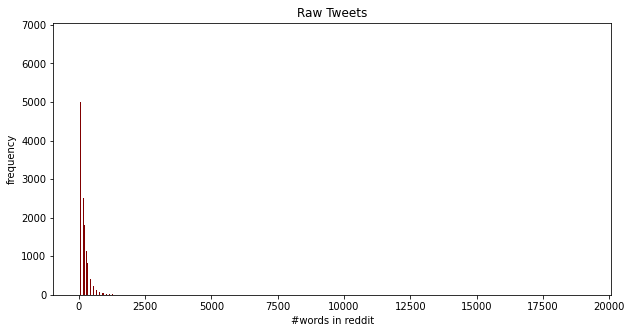

In [ ]:
data = df['num_word'].value_counts()
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("#words in reddit")
plt.ylabel("frequency")
plt.title("Raw Tweets")
plt.show()

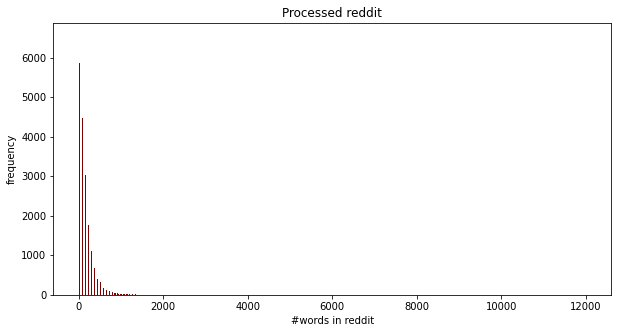

In [ ]:
data = df['processed_num_word'].value_counts()
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("#words in reddit")
plt.ylabel("frequency")
plt.title("Processed reddit")
plt.show()

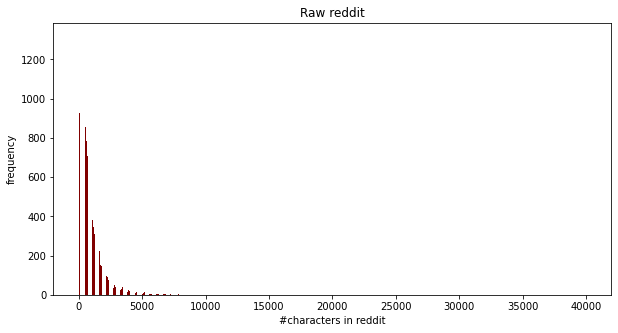

In [ ]:
data = df['num_char'].value_counts()
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("#characters in reddit")
plt.ylabel("frequency")
plt.title("Raw reddit")
plt.show()

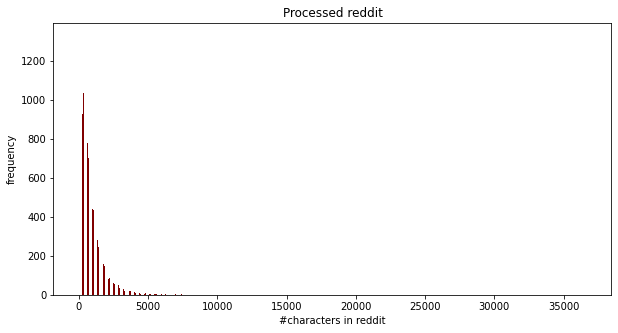

In [ ]:
data = df['processed_num_char'].value_counts()
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("#characters in reddit")
plt.ylabel("frequency")
plt.title("Processed reddit")
plt.show()

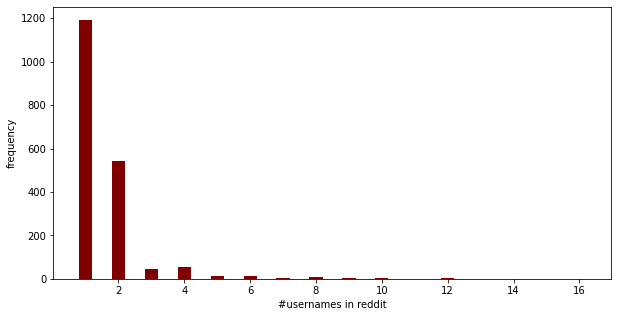

In [ ]:
data = df['num_mentioned_usernames'].value_counts()[1:]
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("#usernames in reddit")
plt.ylabel("frequency")
plt.show()

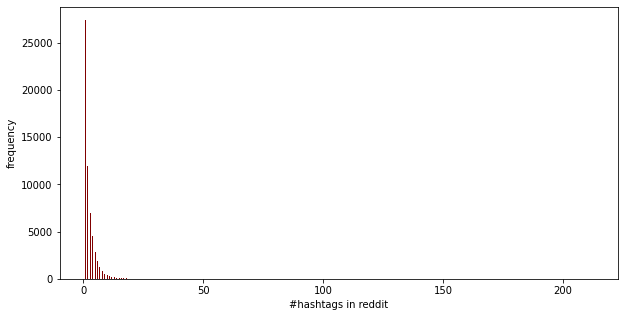

In [ ]:
data = df['num_mentioned_hashtags'].value_counts()[1:]
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("#hashtags in reddit")
plt.ylabel("frequency")
plt.show()

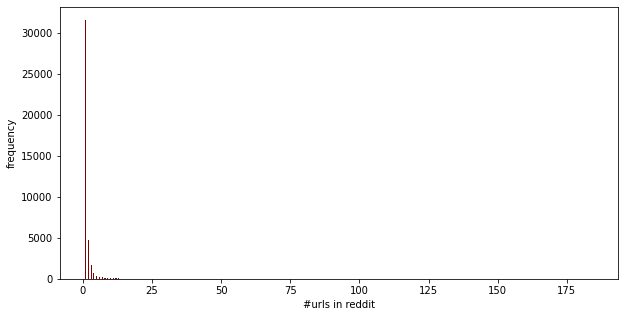

In [ ]:
data = df['num_mentioned_urls'].value_counts()[1:]
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("#urls in reddit")
plt.ylabel("frequency")
plt.show()

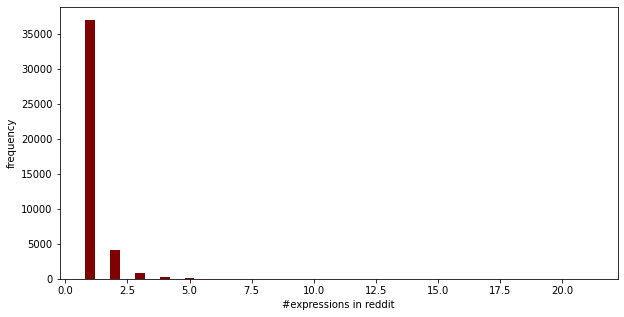

In [ ]:
data = df['num_mentioned_expressions'].value_counts()[1:]
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("#expressions in reddit")
plt.ylabel("frequency")
plt.show()

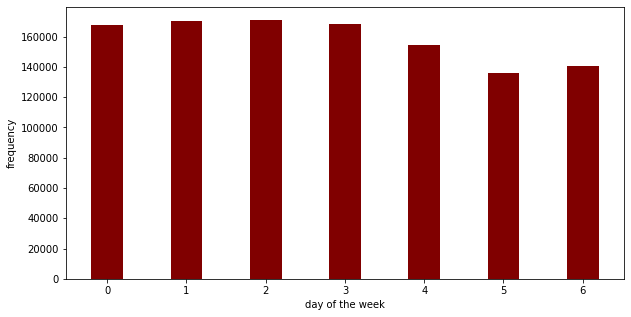

In [ ]:
data = df['date_day_of_week'].value_counts()
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("day of the week")
plt.ylabel("frequency")
plt.show()

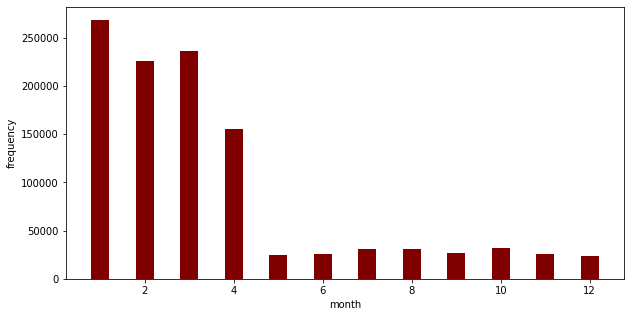

In [ ]:
data = df['date_month'].value_counts()
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("month")
plt.ylabel("frequency")
plt.show()

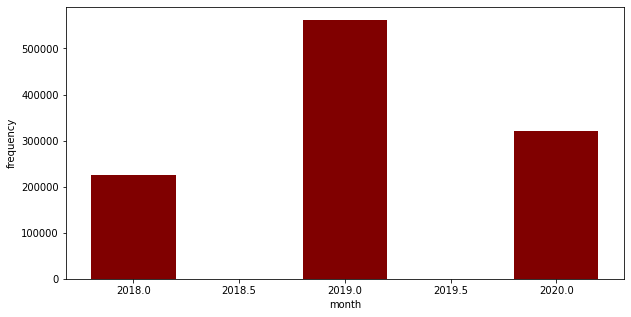

In [ ]:
data = df['date_year'].value_counts()
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("month")
plt.ylabel("frequency")
plt.show()

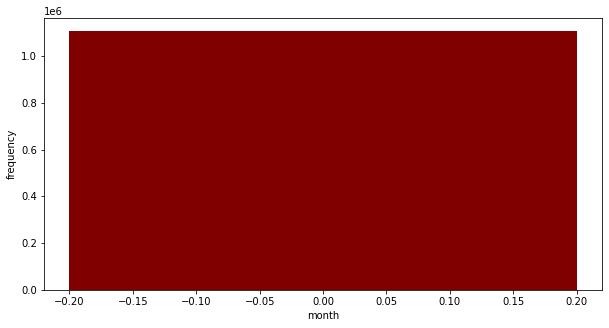

In [ ]:
data = df['date_hour'].value_counts()
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("month")
plt.ylabel("frequency")
plt.show()

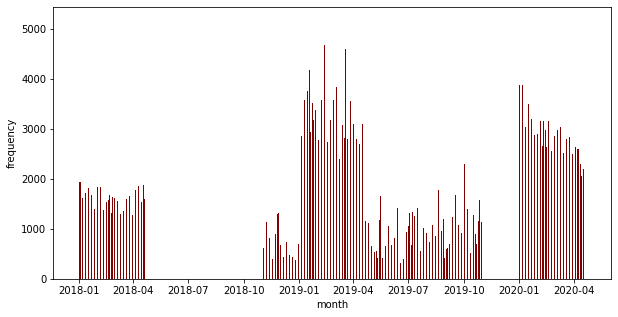

In [ ]:
data = df['date_date'].value_counts()
axes = data.index
values = data.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(axes, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("month")
plt.ylabel("frequency")
plt.show()

In [ ]:
df['processed_num_word'].describe()

count    1.107302e+06
mean     1.835452e+02
std      1.881378e+02
min      0.000000e+00
25%      6.600000e+01
50%      1.300000e+02
75%      2.360000e+02
max      1.200300e+04
Name: processed_num_word, dtype: float64

In [ ]:
# decide to what length the post should be trimmed.
# 90% percentile of length is 393. Trim to 400 would eliminate long posts and outliers
df.processed_num_word.quantile(0.9)

393.0